# Machine Learnig Project 

Here I list the Steps that I am going to take in this Project:
1. Frame the problem and look at the big picture. 
2. Get the data.
3. Explore and visualize the data.
4. Prepare the data for the algorithms.
5. Select the model and train.
6. Fine-tune the model.
7. Present Solutions
8. Launch the model

# 1)Frame the problem and look at the big picture. 

Context: Our task is to use data from the 1990 California census to create a model for predicting home prices in the state.
This data includes metrics such as population, average income, average price per block (a block is the minimum geographic measure for censuses with a population of between 600 and 300 inhabitants).
We are going to call them districts.
We will use the California home price dataset from the StatLib repository.

* What are the business objectives, how will the company benefit from this model.

Our boss replies that the predictions that our model shows are going to feed another ml model, this system is going to determine if it is convenient to invest in the district

* What are the current solutions

Currently prices are estimated manually by experts, this is expensive and time consuming. Their estimates are off by more than 30%.

* Frame the problem

This problem is a typical supervised learnig task, since the model can be trained with labeled examples. More specifically a MULTIPLE REGRETION problem since the sistem will use multiple features to make predictions.
Its also a UNIVARIABLE REGRETION problem , since we are only trying to predict a single value for each district .
There is no continuous flow of data coming into the sistem, there is no need to change the data rapidly and the data is small so BATCH LEARNING should do just fine. 

* Select Performance measure

A typical performance measure for regretion problems is ROOT MEAN SQUARE ERROR (RMSE), gives an idea of how much error the system makes in its predictions, it measure the distance between two vectors (Predictions and Target values) measures accuracy, gives more weith to large errors.
Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

# 2) Get the Data.


In [122]:
from pathlib import Path # manipulate paths 
import pandas as pd 
import tarfile # makes posible to read tar files 
import urllib.request #module defines functions and classes which help in opening URLs (mostly HTTP) in a complex world

In [123]:
# Fetch and load the data 

def load_housing_data():
    new_path=Path("datasets/housing_info.tgz")
    if not new_path.is_file():#is used to check if the entry is a file or not.
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,new_path)# the download
        with tarfile.open(new_path) as housing_tarball:  #The with statement automatically closes the file after you’ve completed writing it.
            housing_tarball.extractall(path='datasets')# here im openig the file like a zip 
    return pd.read_csv(Path('datasets/housing/housing.csv'))

housing=load_housing_data()


* Quick look of the data structure

In [124]:
housing.head()# every row is a district

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [125]:
housing.info()# we can see 3 things here the number of of row, the atribute types and the number of non-null 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


there are 20640 instances in the dataset, wich is small we can notice that  the total_bedrooms atribute have 207 districts (instances) missing this feature.
the other thing we have to check is ocean_proximity wich is an object 

In [126]:
housing['ocean_proximity']# we can see taht is a  str and a repetetive one 

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [127]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [128]:
housing.describe()# this method show a summary of the numerical attributes.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


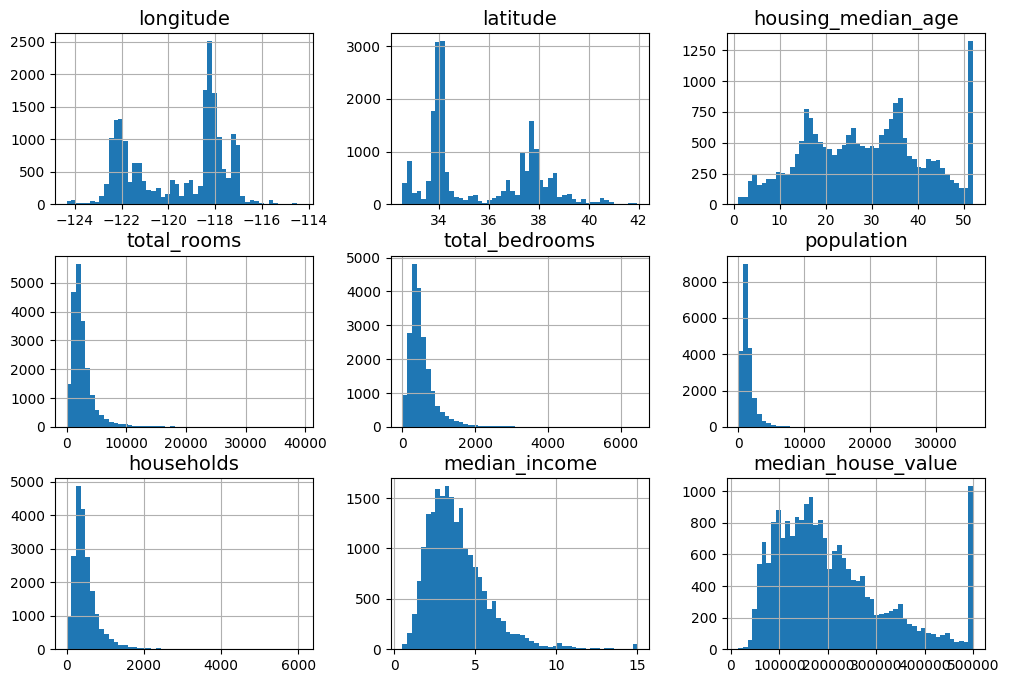

In [129]:
import matplotlib.pyplot as plt

#the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

* # Few things to notice:
- The median income histogram does not look like it is expressed in US dolars. After checking with the team that recolected the data they told us that the data has beeen scaled and capped at 15 ej: 3 actually means 30.000
- The housing median age and the median house value were also capped, this may be a serious problem latter since it is your target attribute(your labels).this atribute have a very diferet scale.
- Many histograms are skewed to the rigth they extend mutch farther to the rigth of the median  than to the left.This may make it a bit harder to some machine lernig algorithms to detect patterns.

# Create a Test Set
Before we look at the data, you have to create the test set and put it aside, look at the test set will create a data snooping bias, and there is high risk to overfit.

In [130]:
#To ensure that this notebook's outputs remain the same every time we run it, 
#we need to set the random seed:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)#42 is the random generator seed 

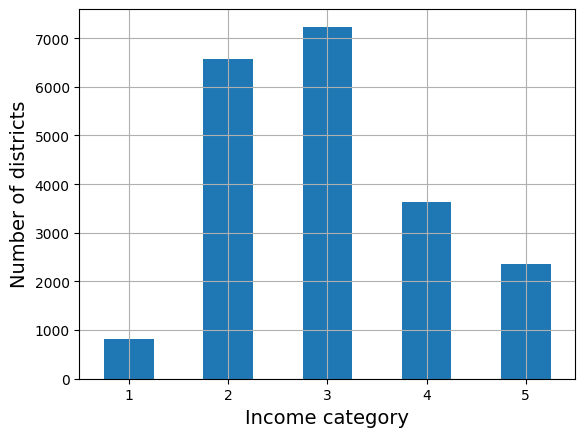

In [131]:
import numpy as np
# we talked to some experts who told us that the median income is a very important atttribute
# to predict median housing prices we want to enssure 
# that the test  set is representative of the various categories of income  
# to do that we have to do stratified sampling


housing['income_cat']=pd.cut(housing['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1,2,3,4,5])# Since the median income is a continuous numerical atribute we want to change it to categorical
#Use cut when you need to segment and sort data values into bins useful for going from a continuous variable to a categorical variable

# remember that each category is eg: 1.5=15.000
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [132]:
# Now we can do Stratified Sampling based on the income category 
strat_train_set, strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=42)


In [133]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)# income category proportions in the test set 

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [134]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


We can see that the test set generated using starrified sampling has income proportions almost identical to those in the full dataset, whereas the test generated using purely random sampling is skewed.

In [135]:
# we wont be using income_cat column, so we can drop it 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

we spend a bit of time on the test set generation for a good reason, this is an often neglected but critical part  

# 3)Explore and Visualize The Data 
So far we only taken a quick glance at the data now the goal is to go into a little more depth.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

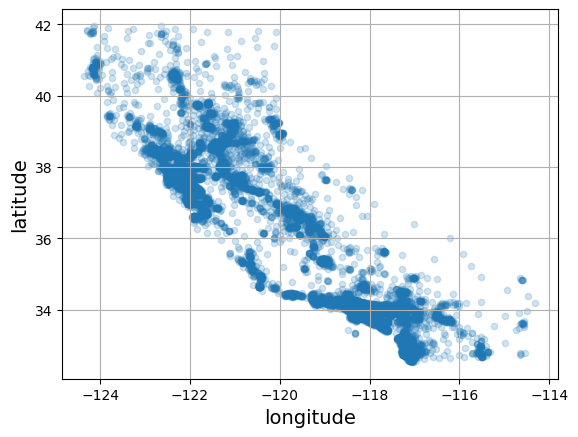

In [136]:
# As the dataset include geografical information 
# it is a good idea to create a scaterplot of all the districts


housing.plot(kind="scatter", x='longitude',y='latitude',grid=True,alpha=0.2)

You can clearly see the high-density areas, the bay areas and around Los Angeles and San Diego

Next we can see the housing prices the radius of each circle represent the distric population and the color the price 

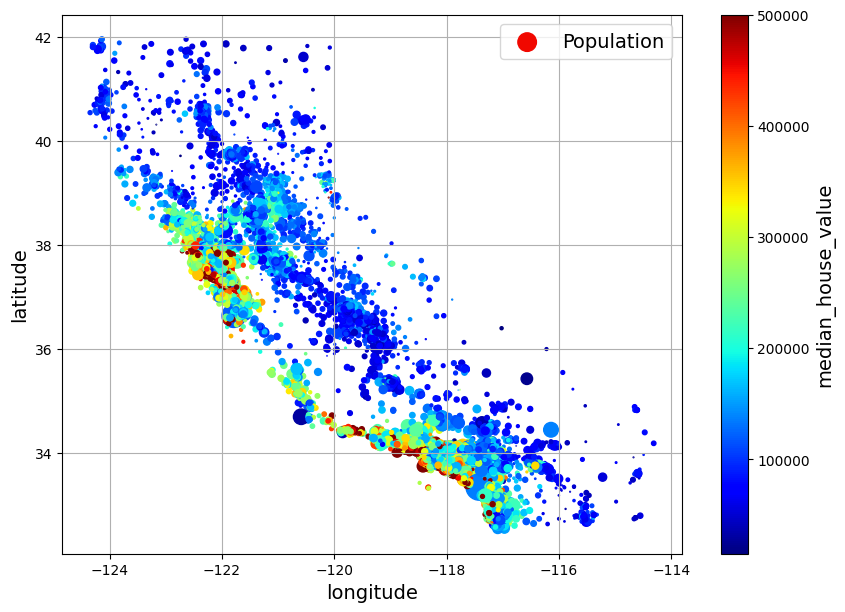

In [137]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,
             s=housing['population']/100, label='Population',
             c='median_house_value',cmap='jet',colorbar=True,
             legend=True,sharex=False,figsize=(10,7))#The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed 
plt.show()

This reveals that housing prices are very much related to the location and polulation density.



# Look For Correlations

Since the dataset is not too large you can easily compute the STANDAR CORRELATION COEFFICIENT (also called Pearson`s) between every pair of attributes using the corr() method:


In [138]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#You can look at how much each attribute correlates with the median house value.

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

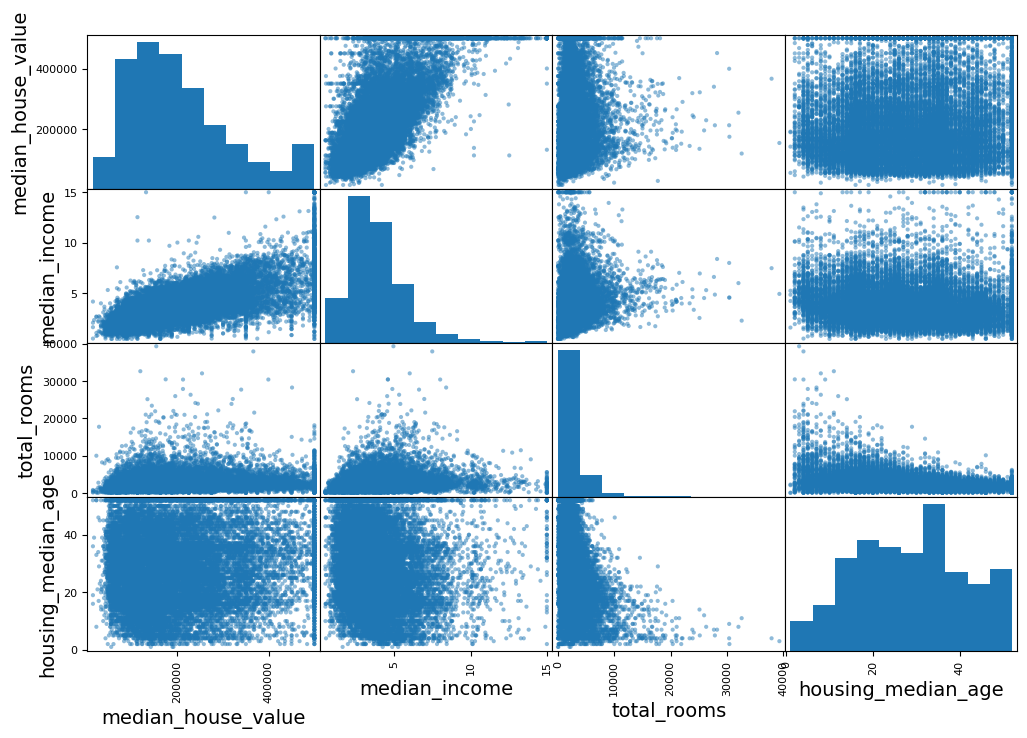

In [139]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms','housing_median_age']# the promising attributes 
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

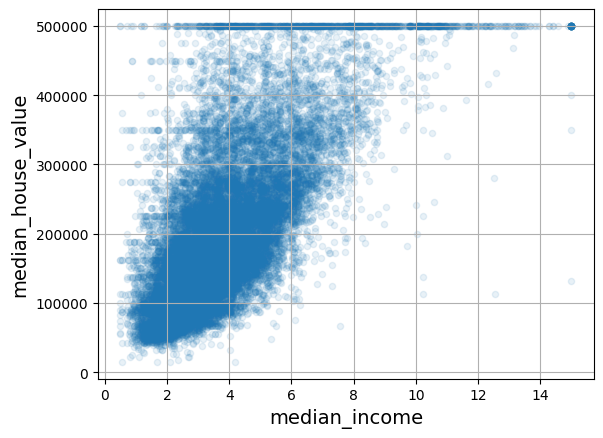

In [140]:
# it seems like the most promising attribute is the median income.
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)


The plot reveals a few things:
the correlation is strong
the price cap at 500.000 y visible 
thanks to the plot we can see less obvious straigth lines  arround 450.000 another around 350.000 and 280.000 and fw more 
we want to remove the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

# 4)Prepare the data for the algorithms.

In [141]:
# Let's revert to the original training set and separate the target
housing=strat_train_set.drop("median_house_value",axis=1)#creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`
housing_labels=strat_train_set["median_house_value"].copy()

Here i will explain what the following pipeline will do:

* Missing values in numerical features will be imputed by replacing them with the median, as most ml algoriths dont expect missing values. In categorical features missing values will be replaced by the most frequent category.

* The categorical feature will be one-hot encoded as most algorithms only accept numerical imputs 

* A few ratio features will be computed and added: bedrooms_ratio, rooms_per_house and people_per_house

* A few cluster similarity features will also be added, these will likely be more useful to the model than latitude and longitude.

* Features with a long tail will be replaces by their logarithm, as most models prefer fetures with rouhly uniform or gaussian distributions.

* All numerical features will be standarized, as most ML algorithms prefer wen all features have roughly the same scale.

In [142]:
from inspect import Signature, signature, Parameter
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import OneHotEncoder
class ClusterSimilarity(BaseEstimator, TransformerMixin): # we defina a custom class a custom transformer 
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]



cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]#numpy  array

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [143]:
housing_prepared= preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [144]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# 5)Select and Train a Model

# Train and Evaluating on the Training Set

In [145]:
# We decided to train a liner regression model to get started.
from sklearn.linear_model import LinearRegression

lin_reg= make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000164C2B1E8F0>)])),
                ('linearregression', LinearRegression())])

In [146]:
# Now we have a working model lets look at the first five predictions and compare them to the labels.


housing_predictions=lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([243700., 372400., 128800.,  94400., 328300.])

In [147]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

It works but the first prediction is way off 200.000 , the others two are off by about 25% and 2 10 %

Now me measure this model with RMSE.

In [148]:
from sklearn.metrics import mean_squared_error 
lin_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
lin_rmse

68687.89176590019

An erro of 68687.89176590016 Its clearly not a great score the median housing values range between 120.000 and 265.000.
This is an example of a model UNDERFITTING the trainig data. This mean that the fetures do not provide enougth information to make good predictions, or the model is not powerful enough.
The main ways to fix underfitting are to select a more powerful model, to feed the algorithm with beter features or to reduce the constrains of the model.

We will try a DecisionTreeRegressor this is a more powerfull model capable of finding complex nonlinear relationships

In [149]:
from sklearn.tree import DecisionTreeRegressor

tree_reg= make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

# Now that model is trained, you evaluate it on the training set:

housing_predictions=tree_reg.predict(housing)
tree_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
tree_rmse

0.0

This model badly overfit the data, we cant touch the test set so we need to use Cross-Validation

In [150]:
from sklearn.model_selection import cross_val_score

tree_rmses=-cross_val_score(tree_reg,housing,housing_labels, 
                          scoring="neg_root_mean_squared_error",cv=10)# this code randomly split the trainig set into 10 nonovelapping subsets 
                                                                    # then it trains and evaluates the decision tree 10 times       

In [151]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

It seems to perform almost as poorly as the linear regression, we have training error 0 but validation error high we know there is an OVERFITTING error.
Lets try another model RANDOM FOREST REGRESSOR this works by trainig many decision trees on random subsets of the features this models are called esembles 

In [152]:
from sklearn.ensemble import  RandomForestRegressor 

forest_reg= make_pipeline(preprocessing, 
                          RandomForestRegressor(random_state=42))

forest_rmses=-cross_val_score(forest_reg,housing,housing_labels, 
                          scoring="neg_root_mean_squared_error",cv=10)

pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

In [153]:
forest_reg.fit(housing,housing_labels)
housing_predictions=forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17474.619286483998

This is much better However the trainig error is much lower than the validation error wich means OVERFITING 

# 6)Fine-tune the model.

We can use scikit-learn GridSearchCV class to search for a great combination of hyperparameters all 
we  have to do is tell wich hyperparameter want to experiment with and what values to try out. 

In [154]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000164C2B1E8F0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [155]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In this example the best model is obtained by setting n_clusters to 15 and setting max_features to 8.

In [156]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head() # Grid Search is fine when you are exploring relatively few combinations but when the 
                # hyperparameter search space y large is preferable to use RandomizedSearchCV

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


The mean RMSE score for the best model is 44042 wich is better than the score we got earlier using default hyperparameters 47019

## Analyze the Best Models and Their Errors

In [157]:
final_model = grid_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.07, 0.01, 0.01, 0.01, 0.01, 0.26, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.01, 0.03, 0.02, 0.02, 0.03, 0.04, 0.01, 0.03, 0.05,
       0.01, 0.01, 0.11, 0.  , 0.  , 0.  , 0.02])

In [158]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.2561371181343418, 'log__median_income'),
 (0.10929441463807747, 'cat__ocean_proximity_INLAND'),
 (0.06947159562525922, 'people_per_house__ratio'),
 (0.06371370041158887, 'bedrooms__ratio'),
 (0.05652758650474487, 'rooms_per_house__ratio'),
 (0.046445363008148874, 'geo__Cluster 13 similarity'),
 (0.040479408639708024, 'geo__Cluster 10 similarity'),
 (0.03231634209782105, 'geo__Cluster 12 similarity'),
 (0.025465696147585044, 'geo__Cluster 6 similarity'),
 (0.025211317253741757, 'geo__Cluster 9 similarity'),
 (0.02450810414146534, 'geo__Cluster 2 similarity'),
 (0.02431695464366818, 'geo__Cluster 3 similarity'),
 (0.024125320102142977, 'geo__Cluster 7 similarity'),
 (0.0236309328316374, 'geo__Cluster 4 similarity'),
 (0.023183969349343744, 'geo__Cluster 1 similarity'),
 (0.02235040640873303, 'remainder__housing_median_age'),
 (0.02031797154546951, 'geo__Cluster 8 similarity'),
 (0.017196746814886383, 'geo__Cluster 0 similarity'),
 (0.014364960863105812, 'geo__Cluster 14 similarity'),

# Evaluate The System on the Test Set

In [159]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

43335.30516058149


We can compute a 95% confidence interval for the test RMSE:

In [161]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([41178.51677793, 45389.72463775])

Save the final model:

In [162]:
import joblib

joblib.dump(final_model , "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [163]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [164]:
predictions

array([443664.82770492, 467153.12      , 107989.        , 100336.        ,
       345291.07      ])

In this California housing example, the final performance of the system is not much better than the experts price estimates, wich where of by 30%, but it may still be a good idea to launch it, especially if this free up some time for the experts so they can work on more interesting and productive taks.